In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Target'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

In [5]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

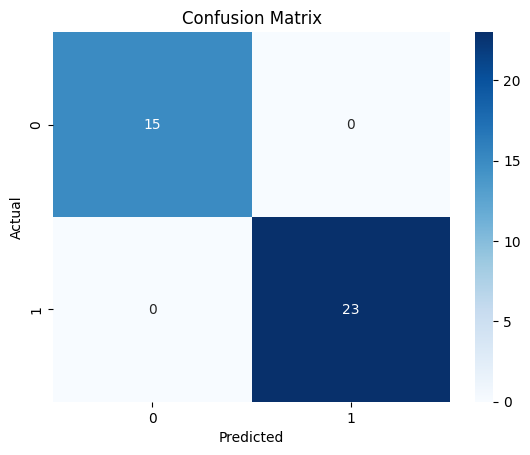

In [8]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Evaluate performance with sklearn
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [10]:
#Manual computation of metrics
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP)
manual_recall = TP / (TP + FN)

print("Manual Accuracy:", manual_accuracy)
print("Manual Precision:", manual_precision)
print("Manual Recall:", manual_recall)

Manual Accuracy: 1.0
Manual Precision: 1.0
Manual Recall: 1.0


**Conclusion**
The confusion matrix shows how well the model classified Iris-setosa vs other species. Based on the matrix, the model may have higher recall if it's better at catching all true Iris-setosa instances, or higher precision if it's more often correct when it predicts Iris-setosa. Our manually calculated accuracy, precision, and recall match those from scikit-learn, confirming the model’s metrics are reliable.